In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Diamonds/diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 1.0, 'Theme for EDA')

<Figure size 432x288 with 0 Axes>

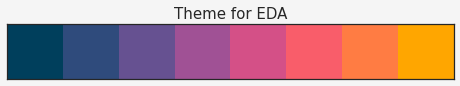

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
colors=['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
sns.set(palette=colors, font='San', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.despine(left=False, right=False)
sns.palplot(colors)
plt.title("Theme for EDA", family='Sherif', size=15, weight=50)

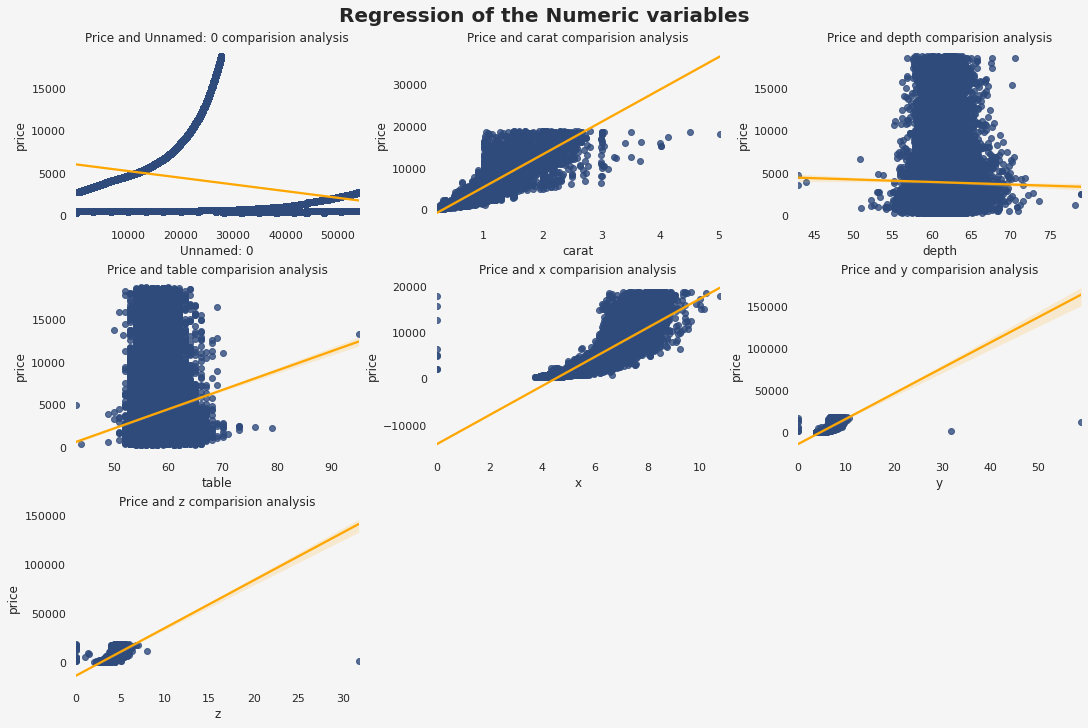

In [8]:
int_cols = df.select_dtypes(exclude='object').columns.to_list()
#print(int_cols)
int_cols.remove('price')
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Regression of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.regplot(data=df, x=i, y='price', color=colors[1], line_kws={'color':'#ffa600'})
    ax.set_title("Price and {} comparision analysis".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

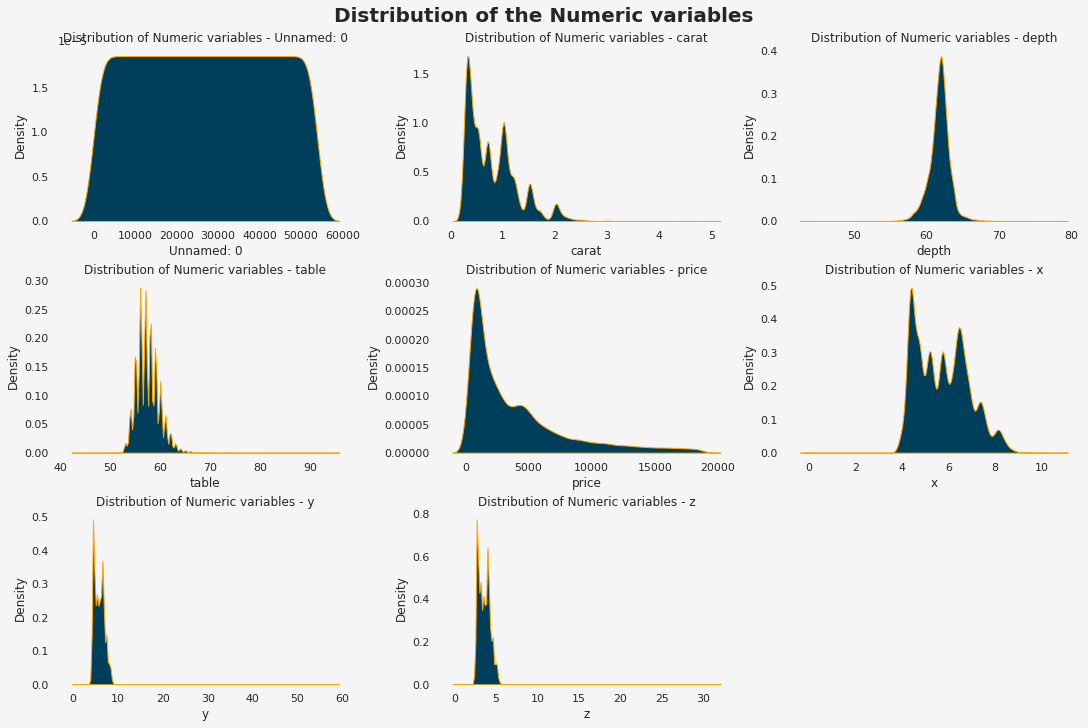

In [9]:
int_cols = df.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Distribution of the Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.kdeplot(data=df, x=i, color=colors[0], fill=True, edgecolor=colors[-1], alpha=1)
    ax.set_title("Distribution of Numeric variables - {}".format(i), family='Sherif')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    
    j=j+1

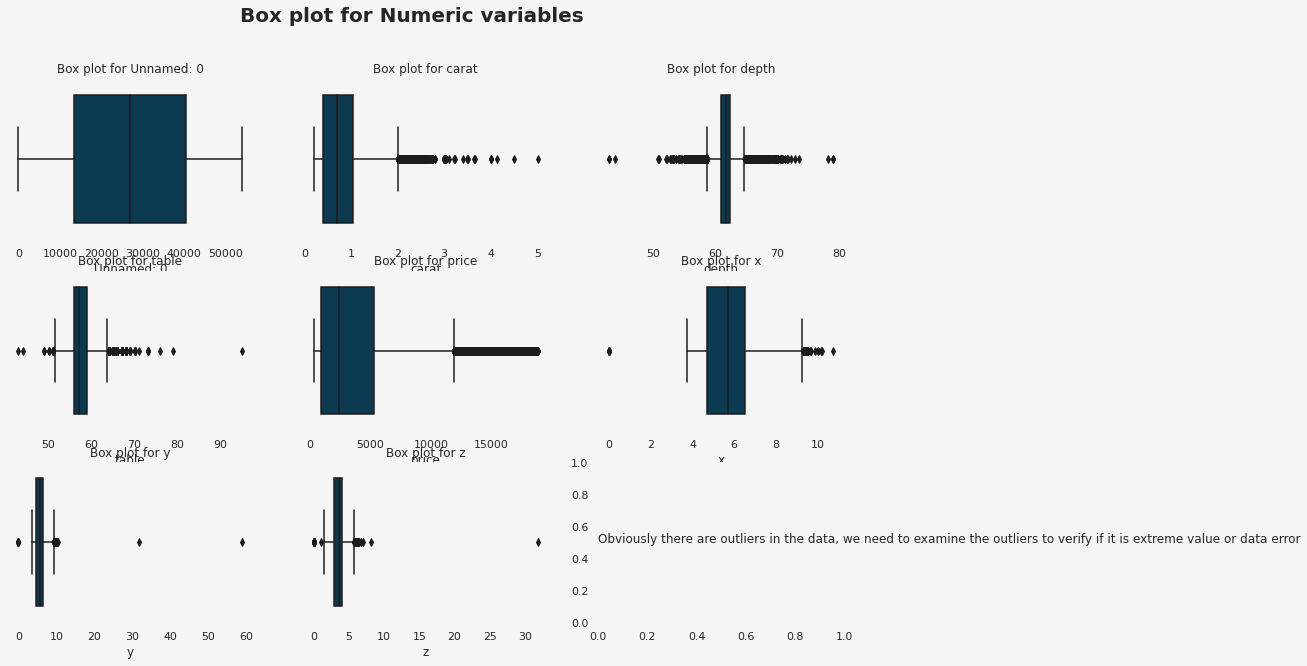

In [10]:
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

Text(0.5, 1.0, 'Correlation matrics')

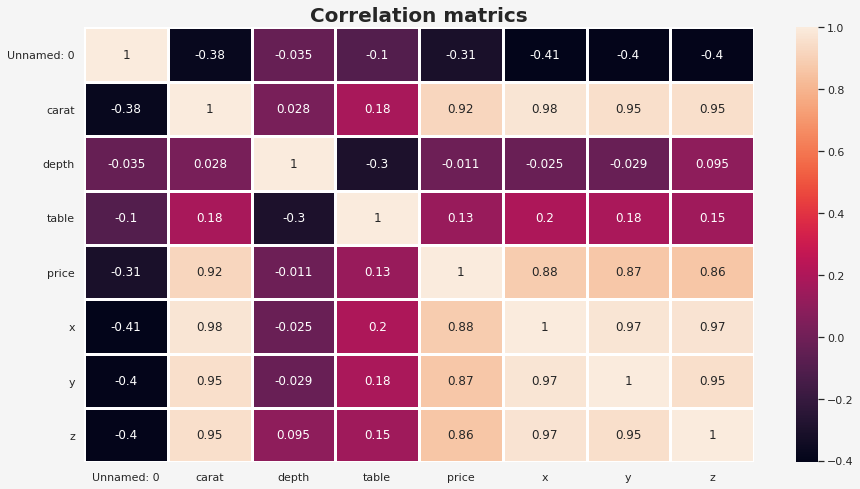

In [11]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=3, annot=True)
plt.title("Correlation matrics", family='Sherif', size=20, weight='bold')

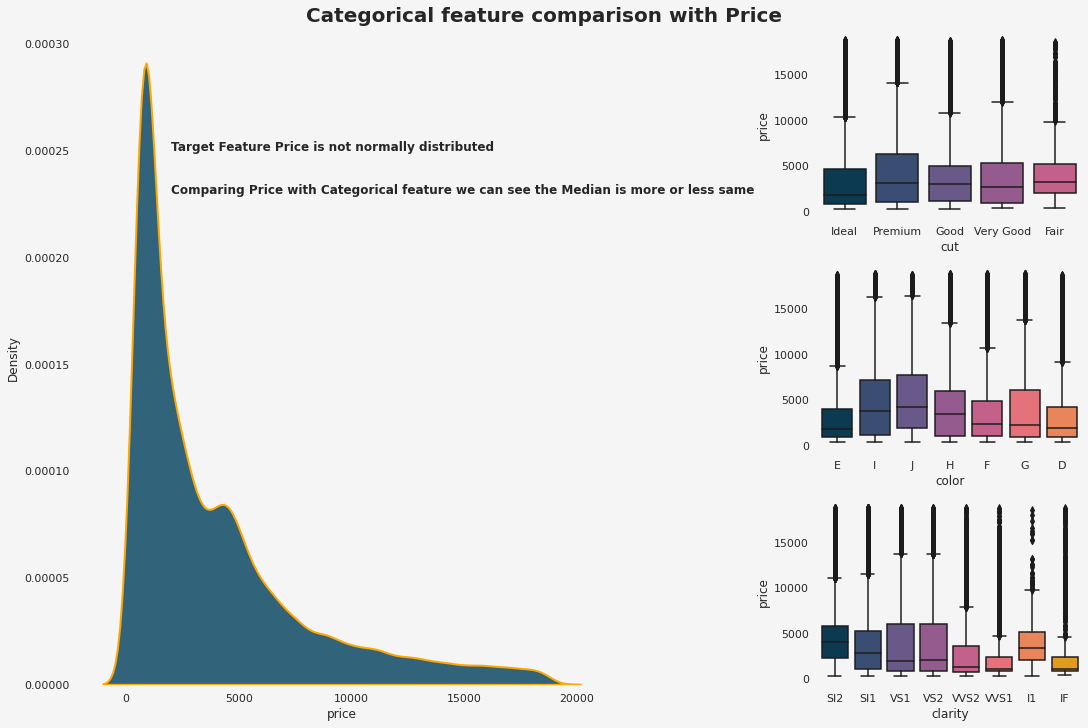

In [12]:
fig=plt.figure(figsize=(15,10), constrained_layout=True)
# let us find the target variable relationship with Categorical variables
plt.suptitle("Categorical feature comparison with Price", family='Sherif', size=20, weight='bold')
cat_cols = df.select_dtypes(include='object').columns.to_list()
ax=fig.subplot_mosaic("""
                        AAB
                        AAC
                        AAD
                        """)
sns.kdeplot(df['price'], fill=True, edgecolor=colors[-1], linewidth=2, color=colors[0], ax=ax['A'], alpha=0.8)
ax['A'].text(x=2000,y=0.00025, s="Target Feature Price is not normally distributed", family='San', fontweight='bold')
ax['A'].text(x=2000,y=0.00023, s="Comparing Price with Categorical feature we can see the Median is more or less same",family='San', fontweight='bold')
sns.boxplot(data=df, x=cat_cols[0],y='price', ax=ax['B'])
sns.boxplot(data=df, x=cat_cols[1],y='price', ax=ax['C'])
sns.boxplot(data=df, x=cat_cols[2],y='price', ax=ax['D'])
for i in 'ABCD':
    for s in ['left','right','top','bottom']:
        ax[i].spines[s].set_visible(False)

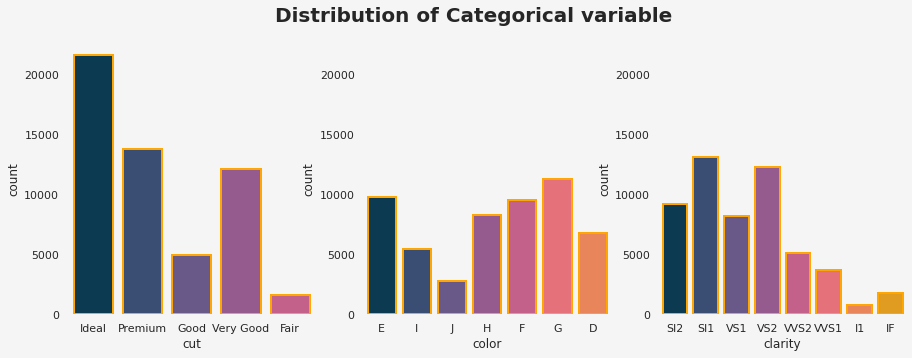

In [13]:
cat_cols=df.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(15,5))
plt.suptitle("Distribution of Categorical variable",family='Sherif', size=20, weight='bold')
ax1=plt.subplot(131)
sns.countplot(data=df, x=cat_cols[0], ax=ax1, linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)
ax2=plt.subplot(132, sharey=ax1)
sns.countplot(data=df, x=cat_cols[1], ax=ax2,linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
ax3=plt.subplot(133, sharey=ax1)
sns.countplot(data=df, x=cat_cols[2], ax=ax3,linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax3.spines[s].set_visible(False)

In [14]:
import statsmodels.api as stats
from statsmodels.stats.anova import anova_lm
from   statsmodels.formula.api import ols

In [15]:
formula='price ~ C(clarity)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                  sum_sq       df        F  PR(>F)
C(clarity)  2.330780e+10      7.0  215.019     0.0
Residual    8.351653e+11  53932.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     215.0
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          1.92e-316
Time:                        23:39:26   Log-Likelihood:            -5.2303e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53932   BIC:                         1.046e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      

In [16]:
formula='price ~ C(color)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(color)  2.684911e+10      6.0  290.206     0.0
Residual  8.316240e+11  53933.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     290.2
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:39:26   Log-Likelihood:            -5.2292e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53933   BIC:                         1.046e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      

In [17]:
formula='price ~ C(cut)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(cut)    1.104175e+10      4.0  175.689     0.0
Residual  8.474314e+11  53935.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     175.7
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          8.43e-150
Time:                        23:39:27   Log-Likelihood:            -5.2343e+05
No. Observations:               53940   AIC:                         1.047e+06
Df Residuals:                   53935   BIC:                         1.047e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|

In [18]:
formula='price ~ C(cut)+C(color)+C(clarity)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                  sum_sq       df        F  PR(>F)
C(cut)      5.574933e+09      4.0   93.715     0.0
C(color)    2.659499e+10      6.0  298.044     0.0
C(clarity)  1.999776e+10      7.0  192.094     0.0
Residual    8.019266e+11  53922.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     223.7
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:39:28   Log-Likelihood:            -5.2194e+05
No. Observations:               53940   AIC:                         1.044e+06
Df Residuals:                   53922   BIC:                         1.044e+06
Df Model:                          17                                         
Covariance Type:            nonrob

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


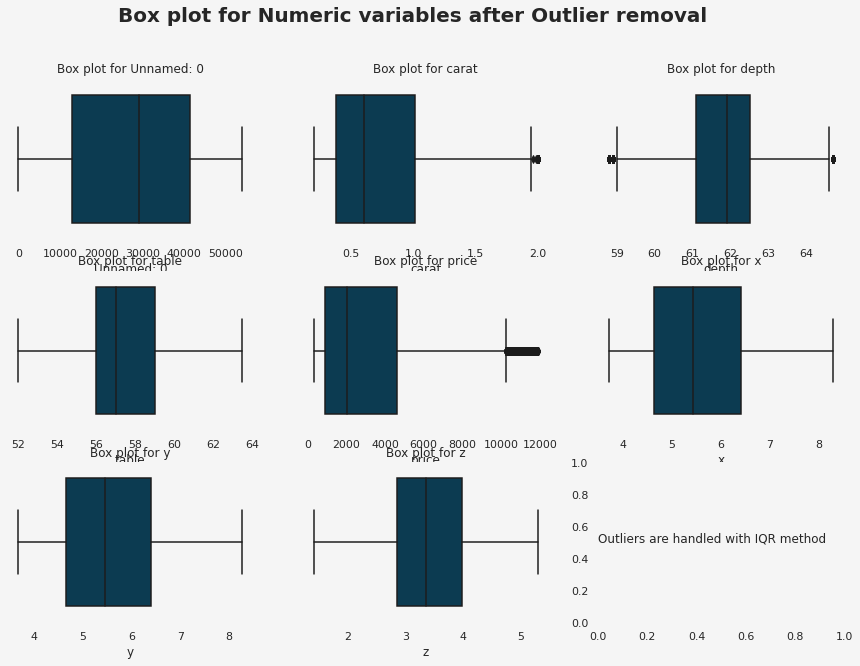

In [19]:
import scipy.stats as st
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df_clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
int_cols=df_clean.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables after Outlier removal", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=df_clean, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Outliers are handled with IQR method')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

In [20]:
df1=pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
df1.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,...,0,0,1,0,0,1,0,0,0,0
5,6,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
X=df1.drop('price', axis=1)
y=df1['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
#creating Polynomial features as there is some degree of variation in the linear relationship
scaler = PolynomialFeatures(degree=2, interaction_only=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)
print()
print()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


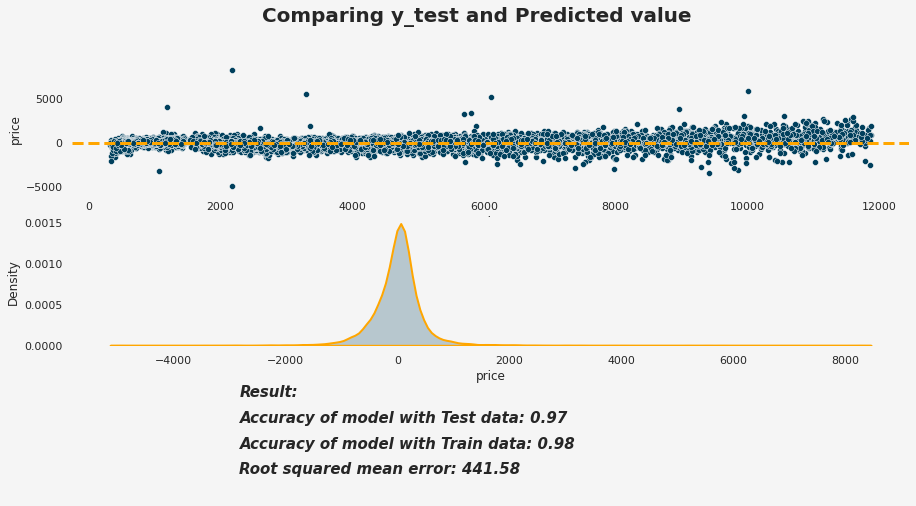

In [25]:
fig=plt.figure(figsize=(15,8))
residual = y_test - pred
plt.suptitle("Comparing y_test and Predicted value", family='Sherif', size=20, weight='bold')
ax=fig.subplot_mosaic("""AA
                          BB
                          CC""")
sns.scatterplot(y_test, residual, ax=ax['A'])
ax['A'].axhline(y=0, ls='--', c=colors[-1], linewidth=3)
sns.kdeplot(residual, ax=ax['B'], fill=True, color=colors[0], edgecolor=colors[-1], linewidth=2)

from sklearn.metrics import mean_squared_error
ax['C'].text(x=0.2,y=0.2,s="Root squared mean error: {}".format(np.round(mean_squared_error(y_test, pred, squared=False),2)), ha='left',family='cursive' ,weight='bold', size=15, style='italic')
ax['C'].text(x=0.2,y=0.4,s="Accuracy of model with Train data: {}".format(np.round(model.score(X_train, y_train),2)), ha='left',family='cursive' ,weight='bold', size=15, style='italic')
ax['C'].text(x=0.2,y=0.6,s="Accuracy of model with Test data: {}".format(np.round(model.score(X_test, y_test),2)), ha='left',family='cursive' ,weight='bold', size=15, style='italic')
ax['C'].text(x=0.2,y=0.8,s="Result:", ha='left',family='cursive' ,weight='bold', size=15, style='italic')

ax['C'].axis('off')

for i in 'ABC':
    for s in ['left','right','top','bottom']:
        ax[i].spines[s].set_visible(False)